In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#EUI
WH_EUI_2014 = pd.read_excel("/Volumes/GoogleDrive/My Drive/#IIT/#Lecture/#2022/#Fall/CAE526 Energy Conservation in Buildings/#Project/Project_1_WH.xlsx", sheet_name = '2014_Monthly')
WH_EUI_2014

,Month,Steam,Electricity,CHW
0,1,0,0.00,0
1,1,0,0.00,0
2,1,0,0.00,0
3,1,0,0.00,0
4,1,0,0.00,0
...,...,...,...,...
360,12,5300,3924.95,0
361,12,13200,4368.64,0
362,12,14000,4436.90,0
363,12,20300,4334.51,0


In [3]:
#Detect
WH_EUI_2014.describe()

,Month,Steam,Electricity,CHW
count,365.000000,365.000000,365.000000,365.000000
mean,6.526027,14728.219178,5497.922219,3908.767123
std,3.452584,44749.553357,6867.459993,11460.144978
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,100.000000,4880.590000,0.000000
50%,7.000000,3600.000000,5324.280000,0.000000
75%,10.000000,22700.000000,5733.840000,5400.000000
max,12.000000,812300.000000,123960.160000,191900.000000


In [4]:
WH_EUI_2014['Total Energy Consumption'] = WH_EUI_2014['Steam'] + WH_EUI_2014['Electricity'] + WH_EUI_2014['CHW']
WH_EUI_2014

,Month,Steam,Electricity,CHW,Total Energy Consumption
0,1,0,0.00,0,0.00
1,1,0,0.00,0,0.00
2,1,0,0.00,0,0.00
3,1,0,0.00,0,0.00
4,1,0,0.00,0,0.00
...,...,...,...,...,...
360,12,5300,3924.95,0,9224.95
361,12,13200,4368.64,0,17568.64
362,12,14000,4436.90,0,18436.90
363,12,20300,4334.51,0,24634.51


In [5]:
WH_EUI_2014.groupby("Month")["Total Energy Consumption"].sum()

Month
1     1798983.62
2     1305384.89
3     1037589.29
4      440151.34
5      391746.76
6      423296.19
7      504991.21
8      618790.83
9      391384.04
10     274410.33
11     847182.70
12     775330.41
Name: Total Energy Consumption, dtype: float64

In [6]:
#Remove Outlier
def detect_outliers(WH_EUI,columns):
    q1=WH_EUI_2014[columns].quantile(0.25)
    q3=WH_EUI_2014[columns].quantile(0.75)
    iqr=q3-q1
    
    boundary=1.5*iqr
    
    index1=WH_EUI_2014[WH_EUI_2014[columns] > q3+boundary].index
    index2=WH_EUI_2014[WH_EUI_2014[columns] < q1-boundary].index 
    
    WH_EUI_2014[columns]=WH_EUI_2014[columns].drop(index1)
    WH_EUI_2014[columns]=WH_EUI_2014[columns].drop(index2)
    
    return WH_EUI_2014

In [7]:
detect_outliers(WH_EUI_2014,'Total Energy Consumption')

,Month,Steam,Electricity,CHW,Total Energy Consumption
0,1,0,0.00,0,0.00
1,1,0,0.00,0,0.00
2,1,0,0.00,0,0.00
3,1,0,0.00,0,0.00
4,1,0,0.00,0,0.00
...,...,...,...,...,...
360,12,5300,3924.95,0,9224.95
361,12,13200,4368.64,0,17568.64
362,12,14000,4436.90,0,18436.90
363,12,20300,4334.51,0,24634.51


In [8]:
#Detect
WH_EUI_2014.describe()

,Month,Steam,Electricity,CHW,Total Energy Consumption
count,365.000000,365.000000,365.000000,365.000000,361.000000
mean,6.526027,14728.219178,5497.922219,3908.767123,20928.585900
std,3.452584,44749.553357,6867.459993,11460.144978,14778.227516
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,100.000000,4880.590000,0.000000,9497.320000
50%,7.000000,3600.000000,5324.280000,0.000000,17694.930000
75%,10.000000,22700.000000,5733.840000,5400.000000,28399.710000
max,12.000000,812300.000000,123960.160000,191900.000000,57175.140000


In [9]:
WH_EUI_2014.groupby("Month")["Total Energy Consumption"].sum()

Month
1      743273.18
2     1305384.89
3     1037589.29
4      440151.34
5      391746.76
6      423296.19
7      504991.21
8      420479.17
9      391384.04
10     274410.33
11     847182.70
12     775330.41
Name: Total Energy Consumption, dtype: float64

In [10]:
#2020
WH_EUI_2020 = pd.read_excel("/Volumes/GoogleDrive/My Drive/#IIT/#Lecture/#2022/#Fall/CAE526 Energy Conservation in Buildings/#Project/Project_1_WH.xlsx", sheet_name = '2020_Monthly')
WH_EUI_2020

,Month,Steam,Electricity,CHW
0,1,0,6481.287,0
1,1,15576,6512.004,0
2,1,28312,6542.721,0
3,1,33760,6286.746,0
4,1,31152,6372.071,0
...,...,...,...,...
361,12,17768,5761.144,0
362,12,23800,5924.968,0
363,12,28940,5904.490,0
364,12,24340,5972.750,0


In [11]:
#Detect
WH_EUI_2020.describe()

,Month,Steam,Electricity,CHW
count,366.000000,3.660000e+02,3.660000e+02,3.660000e+02
mean,6.513661,1.017698e+04,5.602514e+03,3.785574e+04
std,3.455958,8.917384e+06,4.170673e+06,3.896612e+07
min,1.000000,-4.341324e+07,-2.096498e+07,-1.973508e+08
25%,4.000000,0.000000e+00,4.229560e+03,0.000000e+00
50%,7.000000,0.000000e+00,5.409605e+03,0.000000e+00
75%,9.750000,1.890600e+04,6.180943e+03,2.340000e+04
max,12.000000,4.354483e+07,2.103139e+07,1.973508e+08


In [12]:
WH_EUI_2020['Total Energy Consumption'] = WH_EUI_2020['Steam'] + WH_EUI_2020['Electricity'] + WH_EUI_2020['CHW']
WH_EUI_2020

,Month,Steam,Electricity,CHW,Total Energy Consumption
0,1,0,6481.287,0,6481.287
1,1,15576,6512.004,0,22088.004
2,1,28312,6542.721,0,34854.721
3,1,33760,6286.746,0,40046.746
4,1,31152,6372.071,0,37524.071
...,...,...,...,...,...
361,12,17768,5761.144,0,23529.144
362,12,23800,5924.968,0,29724.968
363,12,28940,5904.490,0,34844.490
364,12,24340,5972.750,0,30312.750


In [13]:
#Remove Outlier
def detect_outliers(WH_EUI,columns):
    q1=WH_EUI_2020[columns].quantile(0.25)
    q3=WH_EUI_2020[columns].quantile(0.75)
    iqr=q3-q1
    
    boundary=1.5*iqr
    
    index1=WH_EUI_2020[WH_EUI_2020[columns] > q3+boundary].index
    index2=WH_EUI_2020[WH_EUI_2020[columns] < q1-boundary].index 
    
    WH_EUI_2020[columns]=WH_EUI_2020[columns].drop(index1)
    WH_EUI_2020[columns]=WH_EUI_2020[columns].drop(index2)
    
    return WH_EUI_2020

In [14]:
detect_outliers(WH_EUI_2020,'Total Energy Consumption')

,Month,Steam,Electricity,CHW,Total Energy Consumption
0,1,0,6481.287,0,6481.287
1,1,15576,6512.004,0,22088.004
2,1,28312,6542.721,0,34854.721
3,1,33760,6286.746,0,40046.746
4,1,31152,6372.071,0,37524.071
...,...,...,...,...,...
361,12,17768,5761.144,0,23529.144
362,12,23800,5924.968,0,29724.968
363,12,28940,5904.490,0,34844.490
364,12,24340,5972.750,0,30312.750


In [15]:
WH_EUI_2020.groupby("Month")["Total Energy Consumption"].sum()

Month
1      994306.580
2      713086.892
3      722105.320
4      192350.971
5      473651.980
6     1350730.032
7           0.000
8      385805.693
9     1164750.119
10     640210.538
11     232253.860
12     864899.225
Name: Total Energy Consumption, dtype: float64

In [16]:
WH_EUI_2021 = pd.read_excel("/Volumes/GoogleDrive/My Drive/#IIT/#Lecture/#2022/#Fall/CAE526 Energy Conservation in Buildings/#Project/Project_1_WH.xlsx", sheet_name = '2021_Monthly')
WH_EUI_2021

,Month,Steam,Electricity,CHW
0,1,25040,5689.471,0
1,1,21712,5737.253,0
2,1,23000,5754.318,0
3,1,31580,6256.029,0
4,1,26412,6293.572,0
...,...,...,...,...
360,12,0,0.000,0
361,12,0,0.000,0
362,12,0,0.000,0
363,12,0,0.000,0


In [17]:
#Detect
WH_EUI_2021.describe()

,Month,Steam,Electricity,CHW
count,365.000000,3.650000e+02,3.650000e+02,3.650000e+02
mean,6.526027,-1.212316e+05,-5.814510e+04,-5.406871e+05
std,3.452584,6.513091e+06,3.522331e+06,2.858318e+07
min,1.000000,-4.907749e+07,-2.329268e+07,-2.178276e+08
25%,4.000000,3.688000e+03,5.375475e+03,0.000000e+00
50%,7.000000,1.070000e+04,5.785035e+03,0.000000e+00
75%,10.000000,2.094800e+04,6.194595e+03,1.008000e+05
max,12.000000,4.780905e+07,2.306788e+07,2.171916e+08


In [18]:
WH_EUI_2021['Total Energy Consumption'] = WH_EUI_2021['Steam'] + WH_EUI_2021['Electricity'] + WH_EUI_2021['CHW']
WH_EUI_2021

,Month,Steam,Electricity,CHW,Total Energy Consumption
0,1,25040,5689.471,0,30729.471
1,1,21712,5737.253,0,27449.253
2,1,23000,5754.318,0,28754.318
3,1,31580,6256.029,0,37836.029
4,1,26412,6293.572,0,32705.572
...,...,...,...,...,...
360,12,0,0.000,0,0.000
361,12,0,0.000,0,0.000
362,12,0,0.000,0,0.000
363,12,0,0.000,0,0.000


In [19]:
#Remove Outlier
def detect_outliers(WH_EUI,columns):
    q1=WH_EUI_2021[columns].quantile(0.25)
    q3=WH_EUI_2021[columns].quantile(0.75)
    iqr=q3-q1
    
    boundary=1.5*iqr
    
    index1=WH_EUI_2021[WH_EUI_2021[columns] > q3+boundary].index
    index2=WH_EUI_2021[WH_EUI_2021[columns] < q1-boundary].index 
    
    WH_EUI_2021[columns]=WH_EUI_2021[columns].drop(index1)
    WH_EUI_2021[columns]=WH_EUI_2021[columns].drop(index2)
    
    return WH_EUI_2021

In [20]:
detect_outliers(WH_EUI_2021,'Total Energy Consumption')

,Month,Steam,Electricity,CHW,Total Energy Consumption
0,1,25040,5689.471,0,30729.471
1,1,21712,5737.253,0,27449.253
2,1,23000,5754.318,0,28754.318
3,1,31580,6256.029,0,37836.029
4,1,26412,6293.572,0,32705.572
...,...,...,...,...,...
360,12,0,0.000,0,0.000
361,12,0,0.000,0,0.000
362,12,0,0.000,0,0.000
363,12,0,0.000,0,0.000


In [21]:
WH_EUI_2021.groupby("Month")["Total Energy Consumption"].sum()

Month
1     1056311.378
2      979053.016
3      606888.946
4      708198.864
5     1712078.505
6     2589597.887
7     3470578.283
8     3627470.735
9     2336876.067
10    1173227.616
11     735376.332
12     541248.647
Name: Total Energy Consumption, dtype: float64

In [22]:
#EUI
WH_EUI = pd.read_excel("/Volumes/GoogleDrive/My Drive/#IIT/#Lecture/#2022/#Fall/CAE526 Energy Conservation in Buildings/#Project/Project_1_WH.xlsx", sheet_name = 'Daily')
WH_EUI

,Day,Month,Year,Steam,Electricity,CHW,Total
0,2014-01-01,1,2014,0,0.0,0,0.0
1,2014-01-02,1,2014,0,0.0,0,0.0
2,2014-01-03,1,2014,0,0.0,0,0.0
3,2014-01-04,1,2014,0,0.0,0,0.0
4,2014-01-05,1,2014,0,0.0,0,0.0
...,...,...,...,...,...,...,...
1091,2021-12-27,12,2021,0,0.0,0,0.0
1092,2021-12-28,12,2021,0,0.0,0,0.0
1093,2021-12-29,12,2021,0,0.0,0,0.0
1094,2021-12-30,12,2021,0,0.0,0,0.0


In [23]:
#Detect
WH_EUI.describe()

,Month,Year,Steam,Electricity,CHW,Total
count,1096.000000,1096.000000,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03
mean,6.521898,2018.334854,-3.207023e+04,-1.566214e+04,-1.661212e+05,-2.138536e+05
std,3.450561,3.091616,6.372802e+06,3.150137e+06,2.788864e+07,3.726476e+07
min,1.000000,2014.000000,-4.907749e+07,-2.329268e+07,-2.178276e+08,-2.901978e+08
25%,4.000000,2014.000000,0.000000e+00,4.880590e+03,0.000000e+00,1.089902e+04
50%,7.000000,2020.000000,6.250000e+03,5.552951e+03,0.000000e+00,2.460684e+04
75%,10.000000,2021.000000,2.057600e+04,6.056368e+03,1.555000e+04,4.620652e+04
max,12.000000,2021.000000,4.780905e+07,2.306788e+07,2.171916e+08,2.878696e+08


In [24]:
WH_EUI['Total Energy Consumption'] = WH_EUI['Steam'] + WH_EUI['Electricity'] + WH_EUI['CHW']
WH_EUI

,Day,Month,Year,Steam,Electricity,CHW,Total,Total Energy Consumption
0,2014-01-01,1,2014,0,0.0,0,0.0,0.0
1,2014-01-02,1,2014,0,0.0,0,0.0,0.0
2,2014-01-03,1,2014,0,0.0,0,0.0,0.0
3,2014-01-04,1,2014,0,0.0,0,0.0,0.0
4,2014-01-05,1,2014,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1091,2021-12-27,12,2021,0,0.0,0,0.0,0.0
1092,2021-12-28,12,2021,0,0.0,0,0.0,0.0
1093,2021-12-29,12,2021,0,0.0,0,0.0,0.0
1094,2021-12-30,12,2021,0,0.0,0,0.0,0.0


In [25]:
WH_EUI_Y = WH_EUI.groupby("Year")["Total Energy Consumption"].sum() / 62208 #Gross Area = 62,208 sf
WH_EUI_Y

Year
2014     141.609465
2020     315.562245
2021   -4224.911544
Name: Total Energy Consumption, dtype: float64

In [26]:
WH_EUI_Y.describe()

count       3.000000
mean    -1255.913278
std      2572.698568
min     -4224.911544
25%     -2041.651039
50%       141.609465
75%       228.585855
max       315.562245
Name: Total Energy Consumption, dtype: float64

In [27]:
WH_EUI_Year = pd.DataFrame({
    'WH (2014)': [141.6],
    'WH (2020)': [315.6],
    'WH (2021)': [-4224.9]
    })
WH_EUI_Year

,WH (2014),WH (2020),WH (2021)
0,141.6,315.6,-4224.9


In [28]:
#Mergy with other data
OTH_EUI = pd.DataFrame({
    'CBECS': [84.3],
    'Benchimarking (CHI)': [157],
    'Benchimarking (NY)': [23.4], #NY, GA 62,157sf})
    })
OTH_EUI

,CBECS,Benchimarking (CHI),Benchimarking (NY)
0,84.3,157,23.4


In [29]:
ALL_EUI = pd.concat([WH_EUI_Year, OTH_EUI],axis = 1)
ALL_EUI

,WH (2014),WH (2020),WH (2021),CBECS,Benchimarking (CHI),Benchimarking (NY)
0,141.6,315.6,-4224.9,84.3,157,23.4


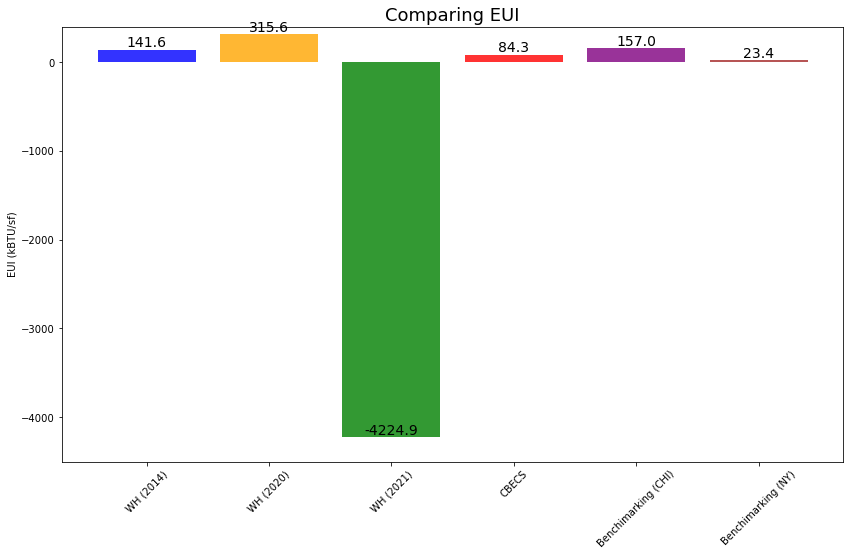

In [30]:
EUI = ['WH (2014)','WH (2020)','WH (2021)','CBECS','Benchimarking (CHI)','Benchimarking (NY)']
Value = [141.6, 315.6, -4224.9, 84.3, 157, 23.4]

plt.figure(figsize = (14, 8))
plt.ylim(-4500, 400)

bar = plt.bar(EUI, Value, color = ['blue', 'orange', 'green', 'red', 'purple', 'brown'], alpha = 0.8)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

plt.title('Comparing EUI', fontsize=18)

plt.xticks(rotation=45)
plt.ylabel('EUI (kBTU/sf)')

plt.show()

In [31]:
WH_EUI_OSM = pd.DataFrame({
    'WH (Ideal)': [49.41],
    'WH (HVAC)': [104.61],
    })
WH_EUI_OSM

,WH (Ideal),WH (HVAC)
0,49.41,104.61


In [32]:
WH_EUI_OSM = pd.DataFrame({
    'WH (2014)': [141.6],
    'WH (2020)': [315.6],
    'WH (2021)': [-4224.9],
    'CBECS': [84.3],
    'Benchimarking (CHI)': [157],
    'Benchimarking (NY)': [23.4],
    'WH (Ideal)': [49.41],
    'WH (HVAC)': [104.61] 
    })
WH_EUI_OSM

,WH (2014),WH (2020),WH (2021),CBECS,Benchimarking (CHI),Benchimarking (NY),WH (Ideal),WH (HVAC)
0,141.6,315.6,-4224.9,84.3,157,23.4,49.41,104.61


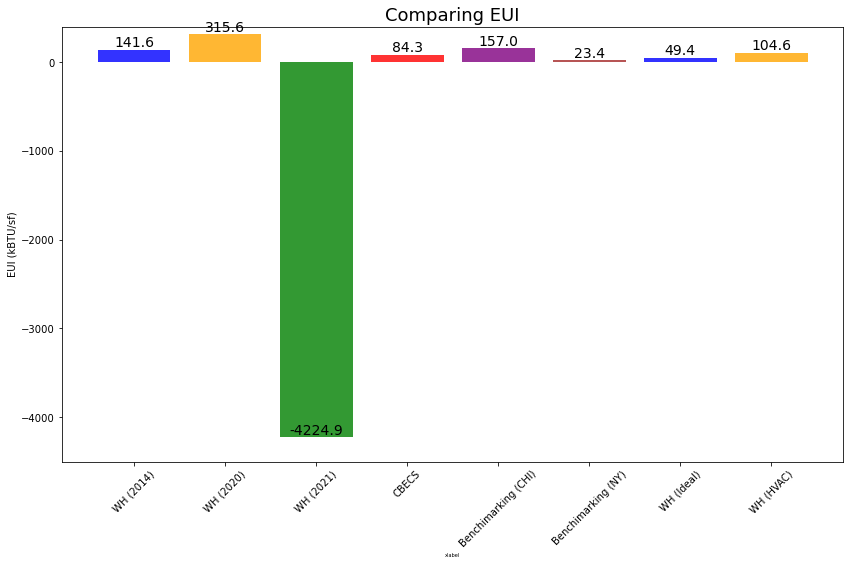

In [33]:
EUI = ['WH (2014)','WH (2020)','WH (2021)','CBECS','Benchimarking (CHI)','Benchimarking (NY)', 'WH (Ideal)', 'WH (HVAC)' ]
Value = [141.6, 315.6, -4224.9, 84.3, 157, 23.4, 49.41, 104.61]

plt.figure(figsize = (14,8))
plt.ylim(-4500, 400)

bar = plt.bar(EUI, Value, color = ['blue', 'orange', 'green', 'red', 'purple', 'brown'], alpha = 0.8)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

plt.title('Comparing EUI', fontsize=18)
plt.xlabel('xlabel', fontsize=5)

plt.xticks(rotation=45)
plt.ylabel('EUI (kBTU/sf)')

plt.show()

In [34]:
#End Use
End_Use = pd.read_excel("/Volumes/GoogleDrive/My Drive/#IIT/#Lecture/#2022/#Fall/CAE526 Energy Conservation in Buildings/#Project/Project_1_WH.xlsx", sheet_name = 'End Use')
End_Use

,End Use (kBTU),Heating,Cooling,Interior Lighting,Exterior Lighting,Interior Equipment,Exterior Equipment,Fans,Pumps,Heat Rejection,Humidification,Heat Recovery,Water Systems,Refrigeration,Generators
0,Ideal,925809,209638,1104965,0,832970,0,0,0,0,0,0,0,0,0
1,HVAC,3296849,620792,1104965,0,832970,0,51713,416585,183744,0,0,0,0,0


<Figure size 7200x2160 with 0 Axes>

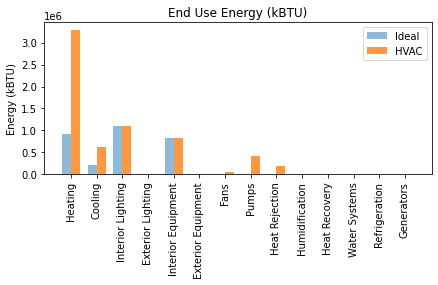

In [35]:
x_label = ['Heating', 'Cooling', 'Interior Lighting', 'Exterior Lighting', 'Interior Equipment', 'Exterior Equipment', 'Fans', 'Pumps', 'Heat Rejection', 'Humidification', 'Heat Recovery', 'Water Systems', 'Refrigeration', 'Generators']
x = np.arange(len(x_label))
y_1 = [925809, 209638, 1104965, 0, 832970, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_2 = [3296849, 620792,1104965, 0, 832970, 0, 51713, 416585, 183744, 0, 0, 0, 0, 0]

plt.figure(figsize = (100,30))
width = 0.35
           
fig, axes = plt.subplots()
           
axes.bar(x - width/2, y_1, width, alpha = 0.5)
axes.bar(x + width/2, y_2, width, alpha = 0.8)

plt.xticks(x)
plt.xticks(rotation=90)
axes.set_xticklabels(x_label)
plt.tight_layout() #fig.tight_layout() or #plt.xlim(0, 14) either works #x axis font size: axes.tick_params(labelsize = 10)

plt.ylabel('Energy (kBTU)')         
           
plt.title('End Use Energy (kBTU)')

plt.legend(['Ideal', 'HVAC'])

plt.show()

In [36]:
#CVRMSE define
def cvrmse(targets, predictions):
    arr=np.array(targets - predictions) 
    return ((np.sqrt(abs((arr)**2).mean())/11/targets.mean())*100)

In [37]:
#CVRMSE_Total
#Data assign
Actual_2014_T = np.array([[1798984, 1305385, 1037589, 440151, 391747, 423296, 504991, 618791, 391384, 274410, 847183, 775330]])
Actual_2020_T = np.array([[1191659, 1175426, 744685, 203491, 473652, 1868584, -248850298, 259124933, 1763009, 640211, 430245, 864899]])
Actual_2021_T = np.array([[1056311, 1057831, 662776, 708199, 1712079, 6592876, 5537585, 4999623, 2336876, 1402391, 766670, -289656514]])
Predict_Ideal_T = np.array([[407709, 326338, 285499, 201187, 201689, 210522, 216985, 224779, 201147, 214579, 241122, 342305]])
Predict_HVAC_T = np.array([[977874, 751993, 611467, 416623, 395056, 393405, 409268, 432145, 398914, 429850, 496277, 795555]])

In [38]:
#CVRMSE_Total (2014 vs HVAC)
cvrmse_Total = cvrmse(np.array(Actual_2014_T), np.array(Predict_HVAC_T))
print(cvrmse_Total)

4.161706428164686


In [39]:
#CVRMSE_Elec (2014 vs Ideal)
cvrmse_Total = cvrmse(np.array(Actual_2014_T), np.array(Predict_Ideal_T))
print(cvrmse_Total)

7.525151476014081


In [40]:
#CVRMSE_Total (2020 vs HVAC)
cvrmse_Total = cvrmse(np.array(Actual_2020_T), np.array(Predict_HVAC_T))
print(cvrmse_Total)

576.3109879542798


In [41]:
#CVRMSE_Total (2020 vs Ideal)
cvrmse_Total = cvrmse(np.array(Actual_2020_T), np.array(Predict_Ideal_T))
print(cvrmse_Total)

576.3431964715489


In [42]:
#CVRMSE_Total (2021 vs HVAC)
cvrmse_Total = cvrmse(np.array(Actual_2021_T), np.array(Predict_HVAC_T))
print(cvrmse_Total)

-34.821380110891575


In [43]:
#CVRMSE_Total (2021 vs Ideal)
cvrmse_Total = cvrmse(np.array(Actual_2021_T), np.array(Predict_Ideal_T))
print(cvrmse_Total)

-34.76904903647948


In [44]:
#NMBE
def nmbe(targets, predictions):
    arr=np.array(targets - predictions)
    return ((np.sum(abs((arr)).mean())/ (11*targets.mean()))*100)

In [45]:
#NMBE_Total (2014 vs HVAC)
nmbe_Total = nmbe(np.array(Actual_2014_T), np.array(Predict_HVAC_T))
print(nmbe_Total)

2.7593152153826566


In [46]:
#NMBE_Total (2014 vs Ideal)
nmbe_Total = nmbe(np.array(Actual_2014_T), np.array(Predict_Ideal_T))
print(nmbe_Total)

5.918763964093863


In [47]:
#NMBE_Total (2020 vs HVAC)
nmbe_Total = nmbe(np.array(Actual_2020_T), np.array(Predict_HVAC_T))
print(nmbe_Total)

237.2002905349643


In [48]:
#NMBE_Total (2020 vs Ideal)
nmbe_Total = nmbe(np.array(Actual_2020_T), np.array(Predict_Ideal_T))
print(nmbe_Total)

238.35418718823087


In [49]:
#NMBE_Total (2021 vs HVAC)
nmbe_Total = nmbe(np.array(Actual_2021_T), np.array(Predict_HVAC_T))
print(nmbe_Total)

-10.777113456989662


In [50]:
#NMBE_Total (2021 vs Ideal)
nmbe_Total = nmbe(np.array(Actual_2021_T), np.array(Predict_Ideal_T))
print(nmbe_Total)

-10.8645578290988


In [51]:
#Removed Outlier_CVRMSE_Total
#Data assign
RO_Actual_2014_T = np.array([[743273, 1305385, 1037589, 440151, 391747, 423296, 504991, 420479, 391384, 274410, 847183, 775330]])
RO_Actual_2020_T = np.array([[1798984, 1350709, 1009770, 433552, 398813, 424608, 502394, 626325, 376662, 288325, 870438, 728662]])
RO_Actual_2021_T = np.array([[1798984, 1305385, 1037589, 440151, 391747, 423296, 504991, 618791, 391384, 274410, 847183, 775330]])
RO_Predict_Ideal_T = np.array([[407709, 326338, 285499, 201187, 201689, 210522, 216985, 224779, 201147, 214579, 241122, 342305]])
RO_Predict_HVAC_T = np.array([[977874, 751993, 611467, 416623, 395056, 393405, 409268, 432145, 398914, 429850, 496277, 795555]])

In [52]:
#CVRMSE_Total (2014 vs HVAC)
cvrmse_Total = cvrmse(np.array(RO_Actual_2014_T), np.array(RO_Predict_HVAC_T))
print(cvrmse_Total)

3.490820470028313


In [53]:
#CVRMSE_Total (2014 vs Ideal)
cvrmse_Total = cvrmse(np.array(RO_Actual_2014_T), np.array(RO_Predict_Ideal_T))
print(cvrmse_Total)

6.578811500063633


In [54]:
#CVRMSE_Total (2020 vs HVAC)
cvrmse_Total = cvrmse(np.array(RO_Actual_2020_T), np.array(RO_Predict_HVAC_T))
print(cvrmse_Total)

4.235837029275455


In [55]:
#CVRMSE_Total (2020 vs Ideal)
cvrmse_Total = cvrmse(np.array(RO_Actual_2020_T), np.array(RO_Predict_Ideal_T))
print(cvrmse_Total)

7.560211053348899


In [56]:
#CVRMSE_Total (2021 vs HVAC)
cvrmse_Total = cvrmse(np.array(RO_Actual_2021_T), np.array(RO_Predict_HVAC_T))
print(cvrmse_Total)

4.161706428164686


In [57]:
#CVRMSE_Total (2021 vs Ideal)
cvrmse_Total = cvrmse(np.array(RO_Actual_2021_T), np.array(RO_Predict_Ideal_T))
print(cvrmse_Total)

7.525151476014081


In [58]:
#RO_NMBE_Total (2014 vs HVAC)
nmbe_Total = nmbe(np.array(RO_Actual_2014_T), np.array(RO_Predict_HVAC_T))
print(nmbe_Total)

2.301038230074295


In [59]:
#NMBE_Total (2014 vs Ideal)
nmbe_Total = nmbe(np.array(RO_Actual_2014_T), np.array(RO_Predict_Ideal_T))
print(nmbe_Total)

5.392247992170325


In [60]:
#RO_NMBE_Total (2020 vs HVAC)
nmbe_Total = nmbe(np.array(RO_Actual_2020_T), np.array(RO_Predict_HVAC_T))
print(nmbe_Total)

2.8504722653776566


In [61]:
#NMBE_Total (2020 vs Ideal)
nmbe_Total = nmbe(np.array(RO_Actual_2020_T), np.array(RO_Predict_Ideal_T))
print(nmbe_Total)

5.9187643241867205


In [62]:
#RO_NMBE_Total (2021 vs HVAC)
nmbe_Total = nmbe(np.array(RO_Actual_2021_T), np.array(RO_Predict_HVAC_T))
print(nmbe_Total)

2.7593152153826566


In [63]:
#NMBE_Total (2021 vs Ideal)
nmbe_Total = nmbe(np.array(RO_Actual_2021_T), np.array(RO_Predict_Ideal_T))
print(nmbe_Total)

5.918763964093863


In [64]:
#NMBE_Modify Predicted Model
#Data assign
Mo_Actual_2014_T = np.array([[743273, 1305385, 1037589, 440151, 391747, 423296, 504991, 420479, 391384, 274410, 847183, 775330]])
Mo_Actual_2020_T = np.array([[1798984, 1350709, 1009770, 433552, 398813, 424608, 502394, 626325, 376662, 288325, 870438, 728662]])
Mo_Actual_2021_T = np.array([[1798984, 1305385, 1037589, 440151, 391747, 423296, 504991, 618791, 391384, 274410, 847183, 775330]])
Mo_Predict_Ideal_T = np.array([[1707709, 1326338, 1085499, 401187, 391689, 410522, 516985, 624779, 381147, 214579, 841122, 742305]])
Mo_Predict_HVAC_T = np.array([[1777874, 1351993, 1011467, 416623, 395056, 393405, 509268, 632145, 398914, 329850, 856277, 785555]])

In [65]:
#CVRMSE_Total (2014 vs HVAC)
cvrmse_Total = cvrmse(np.array(Mo_Actual_2014_T), np.array(Mo_Predict_HVAC_T))
print(cvrmse_Total)

4.416841871429562


In [66]:
#CVRMSE_Total (2014 vs Ideal)
cvrmse_Total = cvrmse(np.array(Mo_Actual_2014_T), np.array(Mo_Predict_Ideal_T))
print(cvrmse_Total)

4.128954281197207


In [67]:
#CVRMSE_Total (2020 vs HVAC)
cvrmse_Total = cvrmse(np.array(Mo_Actual_2020_T), np.array(Mo_Predict_HVAC_T))
print(cvrmse_Total)

0.3088160758768407


In [68]:
#CVRMSE_Total (2020 vs Ideal)
cvrmse_Total = cvrmse(np.array(Mo_Actual_2020_T), np.array(Mo_Predict_Ideal_T))
print(cvrmse_Total)

0.538323170095022


In [69]:
#CVRMSE_Total (2021 vs HVAC)
cvrmse_Total = cvrmse(np.array(Mo_Actual_2021_T), np.array(Mo_Predict_HVAC_T))
print(cvrmse_Total)

0.32514463724635834


In [70]:
#CVRMSE_Total (2021 vs Ideal)
cvrmse_Total = cvrmse(np.array(Mo_Actual_2021_T), np.array(Mo_Predict_Ideal_T))
print(cvrmse_Total)

0.4761221045952166


In [71]:
#RO_NMBE_Total (2014 vs HVAC)
nmbe_Total = nmbe(np.array(Mo_Actual_2014_T), np.array(Mo_Predict_HVAC_T))
print(nmbe_Total)

1.7595196519087266


In [72]:
#NMBE_Total (2014 vs Ideal)
nmbe_Total = nmbe(np.array(Mo_Actual_2014_T), np.array(Mo_Predict_Ideal_T))
print(nmbe_Total)

1.6972532337012884


In [73]:
#RO_NMBE_Total (2020 vs HVAC)
nmbe_Total = nmbe(np.array(Mo_Actual_2020_T), np.array(Mo_Predict_HVAC_T))
print(nmbe_Total)

0.23065135869393036


In [74]:
#NMBE_Total (2020 vs Ideal)
nmbe_Total = nmbe(np.array(Mo_Actual_2020_T), np.array(Mo_Predict_Ideal_T))
print(nmbe_Total)

0.3944999416005889


In [75]:
#RO_NMBE_Total (2021 vs HVAC)
nmbe_Total = nmbe(np.array(Mo_Actual_2021_T), np.array(Mo_Predict_HVAC_T))
print(nmbe_Total)

0.2584971436657978


In [76]:
#NMBE_Total (2021 vs Ideal)
nmbe_Total = nmbe(np.array(Mo_Actual_2021_T), np.array(Mo_Predict_Ideal_T))
print(nmbe_Total)

0.349911478804422


In [77]:
#Removed Outlier_CVRMSE_Total
#Data assign
Mod_Actual_2014_T = np.array([[743273, 1305385, 1037589, 440151, 391747, 423296, 504991, 420479, 391384, 274410, 847183, 775330]])
Mod_Actual_2020_T = np.array([[1798984, 1350709, 1009770, 433552, 398813, 424608, 502394, 626325, 376662, 288325, 870438, 728662]])
Mod_Actual_2021_T = np.array([[1798984, 1305385, 1037589, 440151, 391747, 423296, 504991, 618791, 391384, 274410, 847183, 775330]])
Mod_Predict_Ideal_T = np.array([[3407709, 3326338, 3285499, 3201187, 3201689, 1210522, 1216985, 1224779, 1201147, 1214579, 1241122, 1342305]])
Mod_Predict_HVAC_T = np.array([[2977874, 3751993, 3611467, 3416623, 695056, 1393405, 1409268, 1432145, 1398914, 129850, 1496277, 1795555]])

In [78]:
#CVRMSE_Total (2014 vs HVAC)
cvrmse_Total = cvrmse(np.array(Mod_Actual_2014_T), np.array(Mod_Predict_HVAC_T))
print(cvrmse_Total)

23.5185510132486


In [79]:
#CVRMSE_Total (2014 vs Ideal)
cvrmse_Total = cvrmse(np.array(Mod_Actual_2014_T), np.array(Mod_Predict_Ideal_T))
print(cvrmse_Total)

24.850966258866233


In [80]:
#CVRMSE_Total (2020 vs HVAC)
cvrmse_Total = cvrmse(np.array(Mod_Actual_2020_T), np.array(Mo_Predict_HVAC_T))
print(cvrmse_Total)

0.3088160758768407


In [81]:
#CVRMSE_Total (2020 vs Ideal)
cvrmse_Total = cvrmse(np.array(Mod_Actual_2020_T), np.array(Mod_Predict_Ideal_T))
print(cvrmse_Total)

19.815223999434007


In [82]:
#CVRMSE_Total (2021 vs HVAC)
cvrmse_Total = cvrmse(np.array(Mod_Actual_2021_T), np.array(Mod_Predict_HVAC_T))
print(cvrmse_Total)

18.87259437419177


In [83]:
#CVRMSE_Total (2021 vs Ideal)
cvrmse_Total = cvrmse(np.array(Mod_Actual_2021_T), np.array(Mod_Predict_Ideal_T))
print(cvrmse_Total)

19.82506042304337


In [84]:
#RO_NMBE_Total (2014 vs HVAC)
nmbe_Total = nmbe(np.array(Mod_Actual_2014_T), np.array(Mod_Predict_HVAC_T))
print(nmbe_Total)

19.543782371817247


In [85]:
#NMBE_Total (2014 vs Ideal)
nmbe_Total = nmbe(np.array(Mod_Actual_2014_T), np.array(Mod_Predict_Ideal_T))
print(nmbe_Total)

21.079522908417854


In [86]:
#RO_NMBE_Total (2020 vs HVAC)
nmbe_Total = nmbe(np.array(Mod_Actual_2020_T), np.array(Mod_Predict_HVAC_T))
print(nmbe_Total)

15.496261560508632


In [87]:
#NMBE_Total (2020 vs Ideal)
nmbe_Total = nmbe(np.array(Mod_Actual_2020_T), np.array(Mod_Predict_Ideal_T))
print(nmbe_Total)

16.78466464280045


In [88]:
#RO_NMBE_Total (2021 vs HVAC)
nmbe_Total = nmbe(np.array(Mod_Actual_2021_T), np.array(Mod_Predict_HVAC_T))
print(nmbe_Total)

15.467544510670928


In [89]:
#NMBE_Total (2021 vs Ideal)
nmbe_Total = nmbe(np.array(Mod_Actual_2021_T), np.array(Mod_Predict_Ideal_T))
print(nmbe_Total)

16.784667580122036
